# Modified OffAxis Impacts on the TOLIMAN PSF

This uses images generated in Offaxis3.iypnb. For more information about the image generation visit: https://github.com/ConaireD/Post-Honours/blob/main/Offaxis3.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

The secondary mirror has a diameter of $0.0142$ metres. $1/4000$th of this (one "pixel") is $3.55\times10^{-6}$ metres. The optical length is $0.125$ metres, so doing some trig:

$ \theta = atan(\frac{3.55\times10^{-6}}{0.125}) = 0^{\circ}0' 5.86" $

we find that a one pixel translation is a translation of 3.55 microns which corresponds to an angular change of 5.86 arcseconds.

### We will now load in the PSF with ideal alignment

Sum of image:
1.0


Text(0.5, 1.0, 'Image is stretched')

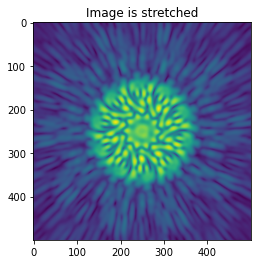

In [2]:
no_Offset = np.load('Images/Offset2/Offset_0_pixels.npy')
plt.imshow(no_Offset**0.2)

print('Sum of image:')
print(np.sum(no_Offset))
plt.title('Image is stretched')

Note that these images are normalised to 1.

We now create a **mask** that is a little bit bigger than the central PSF, with a radius of 140 pix.

Text(0.5, 1.0, 'Image is stretched')

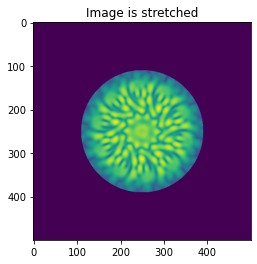

In [3]:
radius = 140

mask = np.zeros((500,500))
y, x = np.indices((500,500))
r = np.sqrt((x-500/2)**2 + (y-500/2)**2)
mask[r<radius] = 1

plt.imshow(mask*no_Offset**0.2)
plt.title('Image is stretched')

We now calculate the root mean square of the residuals:

In [4]:
pixel_offset = np.linspace(-100,100,201)

rms_horiz = np.zeros(len(pixel_offset))
rms_vert  = np.zeros(len(pixel_offset))

for i in tqdm(range(len(pixel_offset))):
    # start with horizontal offset
    image = np.load('Images/Offset2/Offset_{}_pixels.npy'.format(int(pixel_offset[i])))
    image *= mask
    diff = image - no_Offset*mask
    rms = np.sqrt(np.mean(diff**2))
    rms_horiz[i] = rms
    
    # now with verticle offset
    image = np.load('Images/Offset2/Offset_vert_{}_pixels.npy'.format(int(pixel_offset[i])))
    image *= mask
    diff = image - no_Offset*mask
    rms = np.sqrt(np.mean(diff**2))
    rms_vert[i] = rms

  0%|          | 0/201 [00:00<?, ?it/s]

(0.0, 2.5e-07)

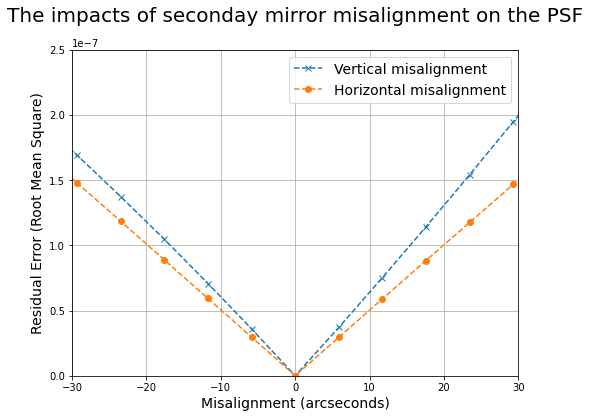

In [5]:
x_arcseconds = pixel_offset * 5.86

plt.figure(figsize = (8,6))
plt.plot(x_arcseconds, rms_vert, '--x', label = 'Vertical misalignment')
plt.plot(x_arcseconds, rms_horiz, '--o', label = 'Horizontal misalignment')
plt.xlabel('Misalignment (arcseconds)', fontsize = 14)
plt.ylabel('Residual Error (Root Mean Square)', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid(True)
plt.title('The impacts of seconday mirror misalignment on the PSF\n', fontsize = 20)
plt.xlim([-30,30])
plt.ylim([0,0.25e-6])


Text(0.5, 1.0, 'The impacts of seconday mirror misalignment on the PSF\n')

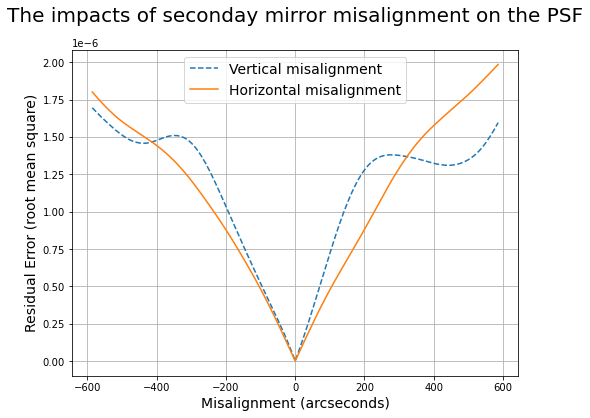

In [6]:
plt.figure(figsize = (8,6))
plt.plot(x_arcseconds, rms_vert, '--', label = 'Vertical misalignment')
plt.plot(x_arcseconds, rms_horiz, label = 'Horizontal misalignment')
plt.xlabel('Misalignment (arcseconds)', fontsize = 14)
plt.ylabel('Residual Error (root mean square)', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid(True)
plt.title('The impacts of seconday mirror misalignment on the PSF\n', fontsize = 20)
